In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU no encontrada')
print('Encontrada GPU: {}'.format(device_name))

SystemError: ignored

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from IPython.display import display, HTML

In [0]:
#Librerias para usar Google Drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Leer_Datos
data_Home = pd.read_csv('/content/drive/My Drive/2020-1/Data TIA/ex1data2(Home_1f).csv',sep='\t' ,header=0)
data_Petrol = pd.read_csv('/content/drive/My Drive/2020-1/Data TIA/petrol_consumption.csv',sep='\t' ,header=0)
data_Oceano = pd.read_csv('/content/drive/My Drive/2020-1/Data TIA/oceano_simple.csv',sep='\t' ,header=0)

def Array(data):
  x = np.array(data.iloc[:,0:-1])
  y = np.array(data.iloc[:,-1])
  return x, y

x_Home , y_Home = Array(data_Home)
x_Petrol , y_Petrol = Array(data_Petrol)
x_Oceano , y_Oceano = Array(data_Oceano)

#print(x_Petrol)
#print(y_Home)

In [5]:
#Normalizar_Datos
def Normalizar_Datos(data):
  rpta = np.empty(data.shape)
  mean = np.mean(data,0)
  stdd = np.std(data,0)
  for i in range(0,data.shape[0]):
    rpta[i] = np.true_divide((data[i] - mean), stdd)
    #print(np.true_divide((data[i] - mean), stdd))
  return rpta

nx_Home = Normalizar_Datos(x_Home)
nx_Petrol = Normalizar_Datos(x_Petrol)
nx_Oceano = Normalizar_Datos(x_Oceano)

ny_Home = Normalizar_Datos(y_Home)
ny_Petrol = Normalizar_Datos(y_Petrol)
ny_Oceano = Normalizar_Datos(y_Oceano)


#Prueba y Test

def Crear_Entrenamiento_Prueba(x_data):
  train , test = np.split(x_data,[int(0.7*len(x_data))])
  return train,test

tr_Home_x, te_Home_x = Crear_Entrenamiento_Prueba(nx_Home)
tr_Petrol_x, te_Petrol_x = Crear_Entrenamiento_Prueba(nx_Petrol)
tr_Oceano_x, te_Oceano_x = Crear_Entrenamiento_Prueba(nx_Oceano)

tr_Home_y, te_Home_y = Crear_Entrenamiento_Prueba(ny_Home)
tr_Petrol_y, te_Petrol_y = Crear_Entrenamiento_Prueba(ny_Petrol)
tr_Oceano_y, te_Oceano_y = Crear_Entrenamiento_Prueba(ny_Oceano)

#Fila de 1s
def addf1(x_data):
  return np.insert(x_data, 0, 1, axis=1)

tr_Home_x = addf1(tr_Home_x)
tr_Petrol_x = addf1(tr_Petrol_x)
tr_Oceano_x = addf1(tr_Oceano_x)

te_Home_x = addf1(te_Home_x)
te_Petrol_x = addf1(te_Petrol_x)
te_Oceano_x = addf1(te_Oceano_x)

#print(tr_Home_x)
#Crear theta
def theta(n):
  return np.zeros(n)[np.newaxis]

""""
print(tr_Home.shape[1])
print(tr_Petrol.shape[1])
print(tr_Oceano.shape[1])
"""
theta_H = theta(tr_Home_x.shape[1])
theta_P = theta(tr_Petrol_x.shape[1])
theta_O = theta(tr_Oceano_x.shape[1])

print(theta_H)
print(theta_P)
print(theta_O)

tr_Home_y = tr_Home_y.reshape(len(tr_Home_y),1)
tr_Oceano_y = tr_Oceano_y.reshape(len(tr_Oceano_y),1)
tr_Petrol_y = tr_Petrol_y.reshape(len(tr_Petrol_y),1)
te_Home_y = te_Home_y.reshape(len(te_Home_y),1)
te_Oceano_y = te_Oceano_y.reshape(len(te_Oceano_y),1)
te_Petrol_y = te_Petrol_y.reshape(len(te_Petrol_y),1)



#print(tr_Home_y)

#Yo = tr_Home_y.reshape(tr_Home_y.shape[0],1)


[[0. 0.]]
[[0. 0. 0. 0. 0.]]
[[0. 0.]]


In [0]:
#Calcular Costo
def Costo(x , y, theta):
  m = x.shape[0]
  cost = np.sum((x.dot(theta.T) - y)**2) / (2 * m)
  return cost

#Gradiente Descendiente 
def Gradiente(x,y, theta, it, alpha):
  costos = np.empty(it)
  m = x.shape[0]
  for i in range(it):
    h = x.dot(theta.T)
    dif = h-y
    der = (x.T).dot(dif)/ m
    theta = theta - (alpha * der).T
    costos[i] = Costo(x,y,theta)
  return theta, costos

def Normal(X, Y):
    Theta = np.linalg.inv(X.T.dot(X))
    Theta = Theta.dot(X.T)
    Theta = Theta.dot(Y)
    return Theta.T

def MSE(Y_r, Y):
    m = len(Y)
    return np.sum((Y_r - Y)**2) / m



Experimento 1: Mostrar en una tabla del Error Cuadratico Medio de la Regresion Lineal usando la Ecuacion Normal para los conjuntos de entrenamiento y prueba de Consumo de Petroleo", "Precio Viviendas"y Temperatura Oceano".

In [7]:
#Experimento1 
import pandas as pd

t_H_n = Normal(tr_Home_x, tr_Home_y)
t_P_n = Normal(tr_Petrol_x, tr_Petrol_y)
t_O_n = Normal(tr_Oceano_x, tr_Oceano_y)

print(t_H_n)

tr_H_en = MSE(tr_Home_x.dot(t_H_n.T), tr_Home_y)
te_H_en = MSE(te_Home_x.dot(t_H_n.T), te_Home_y)
tr_P_en = MSE(tr_Petrol_x.dot(t_P_n.T), tr_Petrol_y)
te_P_en = MSE(te_Petrol_x.dot(t_P_n.T), te_Petrol_y)
tr_O_en = MSE(tr_Oceano_x.dot(t_O_n.T), tr_Oceano_y)
te_O_en = MSE(te_Oceano_x.dot(t_O_n.T), te_Oceano_y)


df = pd.DataFrame({'Consumo Petróleo':[tr_P_en,te_P_en],'Precio Vivienda':[tr_H_en,te_H_en],'Temperatura Océano':[tr_O_en,te_O_en]},
                  index=["Entrenamiento","Prueba"])
#print(df)                        
display(HTML(df.to_html()))


[[0.04941133 0.93421781]]


,Consumo Petróleo,Precio Vivienda,Temperatura Océano
Entrenamiento,0.211136,0.292740,0.169704
Prueba,0.711440,0.245661,0.114843


In [8]:
alphas = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]
its = [500, 1000, 1500, 2000, 2500, 3000, 3500]

rpta = np.empty([len(alphas),len(its)])

min = 999
min_p = (0,0)
for i_a in range(len(alphas)):
    for i_it in range(len(its)):
      tmp_theta , _ = Gradiente(tr_Home_x, tr_Home_y, theta_H , its[i_it],alphas[i_a])
      rpta_l = MSE(te_Home_x.dot(tmp_theta.T), te_Home_y)
      rpta[i_a,i_it] = rpta_l
      if(rpta_l < min):
        min = rpta_l
        min_p = (i_a,i_it)

print("Precio Viviendas, menor MSE con:",alphas[min_p[0]],its[min_p[1]])
df1 = pd.DataFrame(data = rpta, index= alphas, columns = its)
display(HTML(df1.to_html()))


rpta = np.empty([len(alphas),len(its)])

min = 999
min_p = (0,0)
for i_a in range(len(alphas)):
    for i_it in range(len(its)):
      tmp_theta , _ = Gradiente(tr_Petrol_x, tr_Petrol_y, theta_P , its[i_it],alphas[i_a])
      rpta_l = MSE(te_Petrol_x.dot(tmp_theta.T), te_Petrol_y)
      rpta[i_a,i_it] = rpta_l
      if(rpta_l < min):
        min = rpta_l
        min_p = (i_a,i_it)

print("\nConsumo Petróleo, menor MSE con:",alphas[min_p[0]],its[min_p[1]])
df1 = pd.DataFrame(data = rpta, index= alphas, columns = its)
display(HTML(df1.to_html()))

rpta = np.empty([len(alphas),len(its)])

min = 999
min_p = (0,0)
for i_a in range(len(alphas)):
    for i_it in range(len(its)):
      tmp_theta , _ = Gradiente(tr_Oceano_x, tr_Oceano_y, theta_O , its[i_it],alphas[i_a])
      rpta_l = MSE(te_Oceano_x.dot(tmp_theta.T), te_Oceano_y)
      rpta[i_a,i_it] = rpta_l
      if(rpta_l < min):
        min = rpta_l
        min_p = (i_a,i_it)

print("\nTemperatura Océano, menor MSE con:",alphas[min_p[0]],its[min_p[1]])
df1 = pd.DataFrame(data = rpta, index= alphas, columns = its)
display(HTML(df1.to_html()))


Precio Viviendas, menor MSE con: 0.01 500


,500,1000,1500,2000,2500,3000,3500
0.01,0.241804,0.245629,0.245661,0.245661,0.245661,0.245661,0.245661
0.05,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661
0.10,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661
0.20,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661
0.30,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661
0.40,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661,0.245661



Consumo Petróleo, menor MSE con: 0.01 500


,500,1000,1500,2000,2500,3000,3500
0.01,0.684621,0.703287,0.709549,0.711014,0.711345,0.711419,0.711435
0.05,0.711349,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440
0.10,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440
0.20,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440
0.30,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440
0.40,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440,0.711440



Temperatura Océano, menor MSE con: 0.2 500


,500,1000,1500,2000,2500,3000,3500
0.01,0.115236,0.114845,0.114844,0.114843,0.114843,0.114843,0.114843
0.05,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843
0.10,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843
0.20,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843
0.30,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843
0.40,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843,0.114843


[[0. 0.]]
[[2039.5281712  2735.16533761]]


Text(0, 0.5, 'Precio')

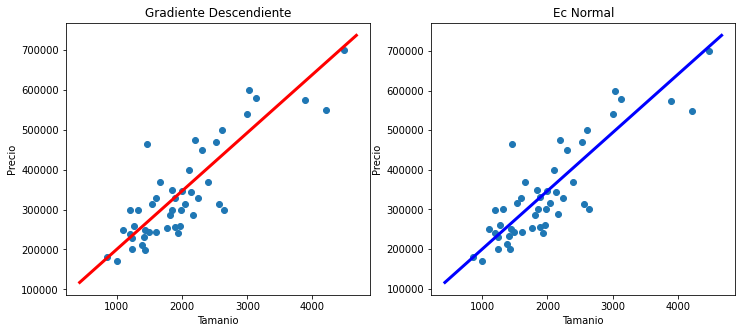

In [9]:
#experimento 3

def No_Normalizar(data,t):
  mean = np.mean(data,0)
  stdd = np.std(data,0)

  return (t*stdd)+mean


fig, ax = plt.subplots(1,2,figsize=(12,5))

points =  np.array(data_Home.iloc[:,:])
print(theta_H)

tmp_theta , _ = Gradiente(tr_Home_x, tr_Home_y, theta_H , its[0],alphas[0])

tmp = No_Normalizar(x_Home,t_H_n);
print(tmp)

rect_p = np.arange(-2,3.5,0.1)[np.newaxis].T
rect_p = np.insert(rect_p, 0, 1, axis=1)

yn = rect_p.dot(t_H_n.T)
yg = rect_p.dot(tmp_theta.T)

rect_p = No_Normalizar(x_Home,rect_p)
yn = No_Normalizar(y_Home,yn)

yg = No_Normalizar(y_Home,yg)

ax[0].scatter(points[:,0],points[:,1])
ax[0].plot(rect_p[:,1],yg,'-r',linewidth=3.0)
ax[0].set_title("Gradiente Descendiente")
ax[0].set_xlabel("Tamanio")
ax[0].set_ylabel("Precio")

ax[1].scatter(points[:,0],points[:,1])
ax[1].plot(rect_p[:,1],yn,'-b',linewidth=3.0)
ax[1].set_title("Ec Normal")
ax[1].set_xlabel("Tamanio")
ax[1].set_ylabel("Precio")



ENTRENAMIENTO - ROJO
PRUEBA - AZUL


Text(0, 0.5, 'Costo')

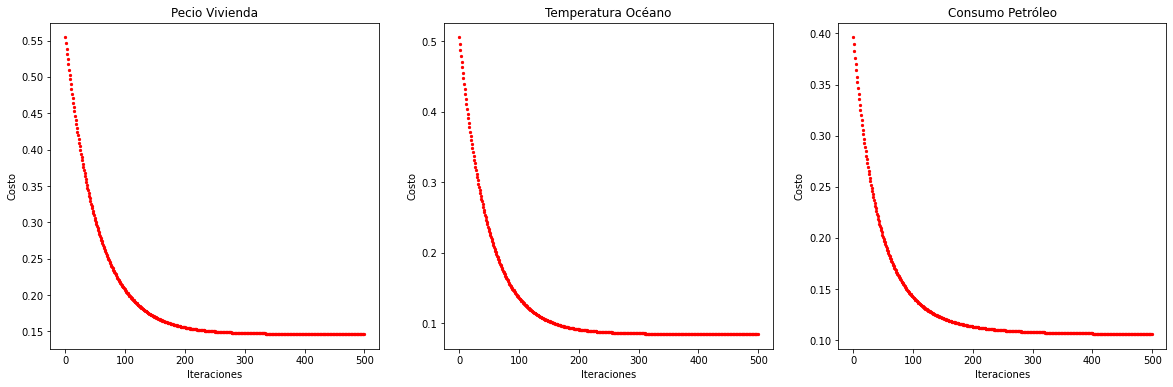

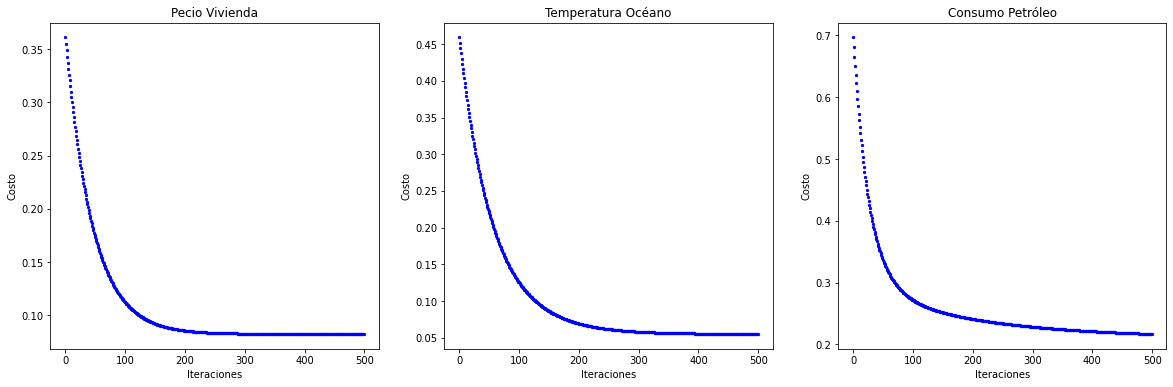

In [21]:
#Experimento 4

fig, ax = plt.subplots(1,3,figsize=(20,6))

print("ENTRENAMIENTO - ROJO")


theta_H4, costos_H = Gradiente(tr_Home_x, tr_Home_y, theta_H, its[0], alphas[0])
ax[0].scatter(np.arange(its[0]),costos_H, c="red", s=5)
ax[0].s_title("Pecio Vivienda")
ax[0].set_xlabel('Iteraciones')
ax[0].set_ylabel('Costo')

theta_O4 , costos_O = Gradiente(tr_Oceano_x, tr_Oceano_y, theta_O, its[0], alphas[0])
ax[1].scatter(np.arange(its[0]),costos_O, c="red", s=5)
ax[1].set_title("Temperatura Océano")
ax[1].set_xlabel('Iteraciones')
ax[1].set_ylabel('Costo')

theta_P4, costos_P = Gradiente(tr_Petrol_x, tr_Petrol_y, theta_P, its[0], alphas[0])
ax[2].scatter(np.arange(its[0]),costos_P, c="red", s=5)
ax[2].set_title("Consumo Petróleo")
ax[2].set_xlabel('Iteraciones')
ax[2].set_ylabel('Costo')


fig2, ax2 = plt.subplots(1,3,figsize=(20,6))

print("PRUEBA - AZUL")


theta_H4, costos_H = Gradiente(te_Home_x, te_Home_y, theta_H, its[0], alphas[0])
ax2[0].scatter(np.arange(its[0]),costos_H, c="blue", s=5)
ax2[0].set_title("Pecio Vivienda")
ax2[0].set_xlabel('Iteraciones')
ax2[0].set_ylabel('Costo')

theta_O4 , costos_O = Gradiente(te_Oceano_x, te_Oceano_y, theta_O, its[0], alphas[0])
ax2[1].scatter(np.arange(its[0]),costos_O, c="blue", s=5)
ax2[1].set_title("Temperatura Océano")
ax2[1].set_xlabel('Iteraciones')
ax2[1].set_ylabel('Costo')

theta_P4, costos_P = Gradiente(te_Petrol_x, te_Petrol_y, theta_P, its[0], alphas[0])
ax2[2].scatter(np.arange(its[0]),costos_P, c="blue", s=5)
ax2[2].set_title("Consumo Petróleo")
ax2[2].set_xlabel('Iteraciones')
ax2[2].set_ylabel('Costo')


